In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/public_timeseries_testing_util.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/amp-parkinsons-disease-progression-prediction/amp_pd_peptide_310/__init__.py
/kaggle/input/amp-parkinsons-disease-progression-prediction/example_test_files/sample_submission.csv
/kaggle/input/amp-parkinsons-disease-progression-pre

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np

# Read the supplemental clinical data
supplemental_clinical_data = pd.read_csv('/kaggle/input/amp-parkinsons-disease-progression-prediction/supplemental_clinical_data.csv')

# Read the training clinical data
train_clinical_data = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_clinical_data.csv")

# Read the training peptides data
train_peptides = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_peptides.csv")

# Read the training proteins data
train_proteins = pd.read_csv("/kaggle/input/amp-parkinsons-disease-progression-prediction/train_proteins.csv")

In [8]:
# Print the first five rows of the supplemental clinical data
supplemental_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


In [9]:
#Print the first five rows of the train clinical data
train_clinical_data.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [10]:
#Print the first five rows of the p
train_peptides.head()
print(train_peptides.shape)

(981834, 6)


In [11]:
train_proteins.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [12]:
# Import the ProfileReport function from the pandas_profiling library
from pandas_profiling import ProfileReport

# Generate a profile report of the train_clinical_data DataFrame
profile_train_clinical_data = ProfileReport(train_clinical_data, title='Pandas Profiling Report', explorative=True)

In [13]:
# Print the profile_train_clinical_data object
profile_train_clinical_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:

# Merge protein peptide and peptides
all_protein = pd.merge(train_peptides,train_proteins, on = ['visit_id', 'visit_month', 'patient_id', 'UniProt'])

all_train_data = pd.merge(train_clinical_data,all_protein,on = ['visit_id', 'visit_month', 'patient_id'] )
print(all_train_data)

        visit_id  patient_id  visit_month  updrs_1  updrs_2  updrs_3  updrs_4  \
0           55_0          55            0     10.0      6.0     15.0      NaN   
1           55_0          55            0     10.0      6.0     15.0      NaN   
2           55_0          55            0     10.0      6.0     15.0      NaN   
3           55_0          55            0     10.0      6.0     15.0      NaN   
4           55_0          55            0     10.0      6.0     15.0      NaN   
...          ...         ...          ...      ...      ...      ...      ...   
941739  65043_48       65043           48      7.0      6.0     13.0      0.0   
941740  65043_48       65043           48      7.0      6.0     13.0      0.0   
941741  65043_48       65043           48      7.0      6.0     13.0      0.0   
941742  65043_48       65043           48      7.0      6.0     13.0      0.0   
941743  65043_48       65043           48      7.0      6.0     13.0      0.0   

       upd23b_clinical_stat

In [15]:
print(all_train_data.describe())

          patient_id    visit_month        updrs_1        updrs_2  \
count  941744.000000  941744.000000  941744.000000  941744.000000   
mean    32682.203127      26.771747       6.506168       5.781905   
std     18608.454453      22.889144       5.310697       5.920009   
min        55.000000       0.000000       0.000000       0.000000   
25%     16574.000000       6.000000       2.000000       1.000000   
50%     29313.000000      24.000000       5.000000       4.000000   
75%     50611.000000      48.000000       9.000000       9.000000   
max     65043.000000     108.000000      33.000000      29.000000   

             updrs_3        updrs_4  PeptideAbundance           NPX  
count  932624.000000  495530.000000      9.417440e+05  9.417440e+05  
mean       17.205189       1.887924      6.432814e+05  1.700905e+07  
std        15.020913       3.047579      3.378418e+06  6.319169e+07  
min         0.000000       0.000000      1.099850e+01  8.460820e+01  
25%         2.000000       0

In [16]:
all_train_data['updrs_1'].fillna(all_train_data['updrs_1'].median(), inplace=True)
all_train_data['updrs_2'].fillna(all_train_data['updrs_2'].median(), inplace=True)
all_train_data['updrs_3'].fillna(all_train_data['updrs_3'].median(), inplace=True)
all_train_data['updrs_4'].fillna(all_train_data['updrs_4'].median(), inplace=True)

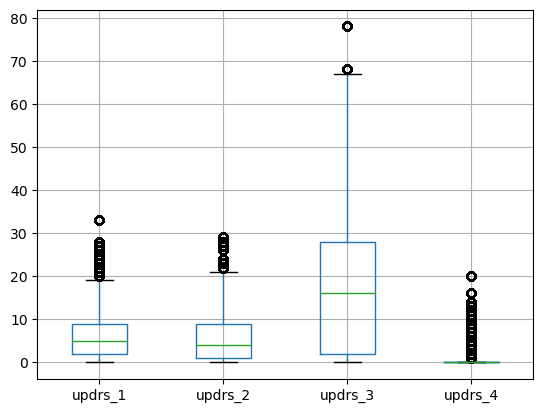

In [17]:
boxplot= all_train_data.boxplot(column=['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']) 


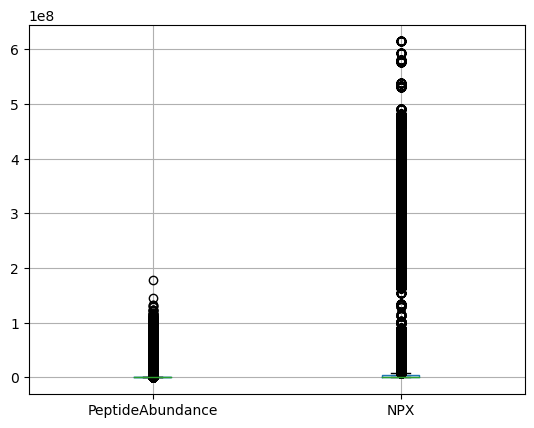

In [18]:
boxplot= all_train_data.boxplot(column=['PeptideAbundance','NPX']) 

In [19]:
# Detecting outliers and replacing them with flooring and capping method
Q1 = all_train_data['updrs_1'].quantile(0.25)
Q3 = all_train_data['updrs_1'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['updrs_1']=np.where(all_train_data['updrs_1']>upper_whisker,upper_whisker,np.where(all_train_data['updrs_1']<lower_whisker,lower_whisker,all_train_data['updrs_1']))

Q1 = all_train_data['updrs_2'].quantile(0.25)
Q3 = all_train_data['updrs_2'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['updrs_2']=np.where(all_train_data['updrs_2']>upper_whisker,upper_whisker,np.where(all_train_data['updrs_2']<lower_whisker,lower_whisker,all_train_data['updrs_2']))

Q1 = all_train_data['updrs_2'].quantile(0.25)
Q3 = all_train_data['updrs_2'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['updrs_2']=np.where(all_train_data['updrs_2']>upper_whisker,upper_whisker,np.where(all_train_data['updrs_2']<lower_whisker,lower_whisker,all_train_data['updrs_2']))

Q1 = all_train_data['updrs_3'].quantile(0.25)
Q3 = all_train_data['updrs_3'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['updrs_3']=np.where(all_train_data['updrs_3']>upper_whisker,upper_whisker,np.where(all_train_data['updrs_3']<lower_whisker,lower_whisker,all_train_data['updrs_3']))



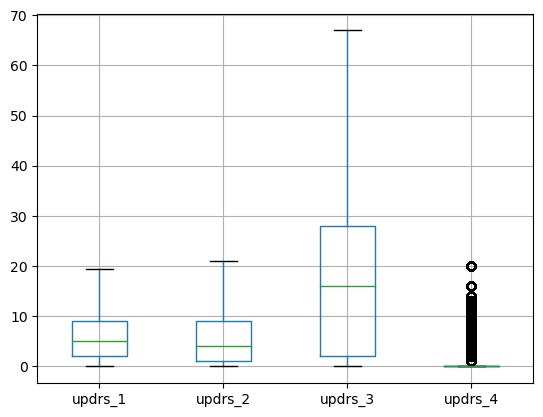

In [20]:
boxplot= all_train_data.boxplot(column=['updrs_1','updrs_2', 'updrs_3', 'updrs_4']) 

In [21]:
all_train_data['PeptideAbundance'].fillna(all_train_data['PeptideAbundance'].median(), inplace=True)
all_train_data['NPX'].fillna(all_train_data['NPX'].median(), inplace=True)

In [22]:
# Remove outliers from NPX and PeptideAbundance
Q1 = all_train_data['NPX'].quantile(0.25)
Q3 = all_train_data['NPX'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['NPX']=np.where(all_train_data['NPX']>upper_whisker,upper_whisker,np.where(all_train_data['NPX']<lower_whisker,lower_whisker,all_train_data['NPX']))

Q1 = all_train_data['PeptideAbundance'].quantile(0.25)
Q3 = all_train_data['PeptideAbundance'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
all_train_data['PeptideAbundance']=np.where(all_train_data['PeptideAbundance']>upper_whisker,upper_whisker,np.where(all_train_data['PeptideAbundance']<lower_whisker,lower_whisker,all_train_data['PeptideAbundance']))

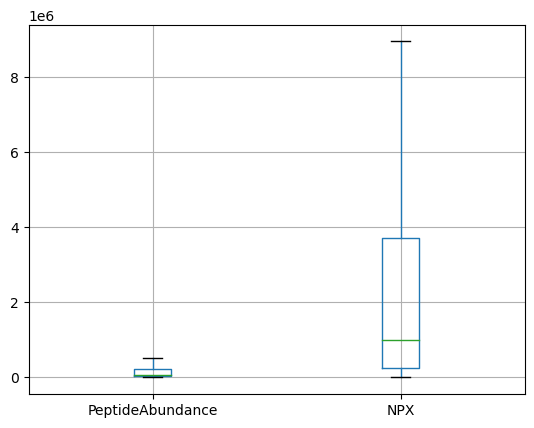

In [23]:
boxplot= all_train_data.boxplot(column=['PeptideAbundance','NPX']) 

<AxesSubplot:xlabel='PeptideAbundance', ylabel='Count'>

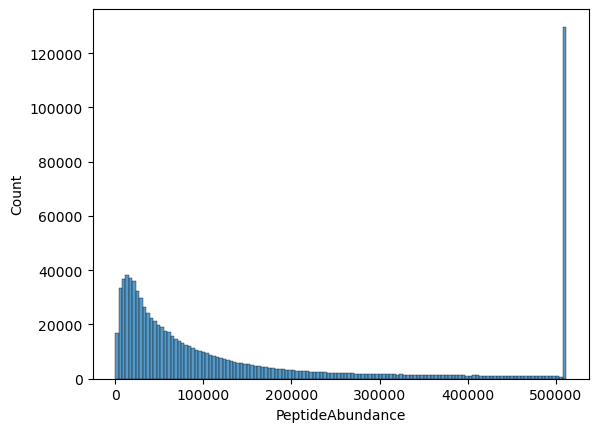

In [24]:
sns.histplot(all_train_data['PeptideAbundance'])

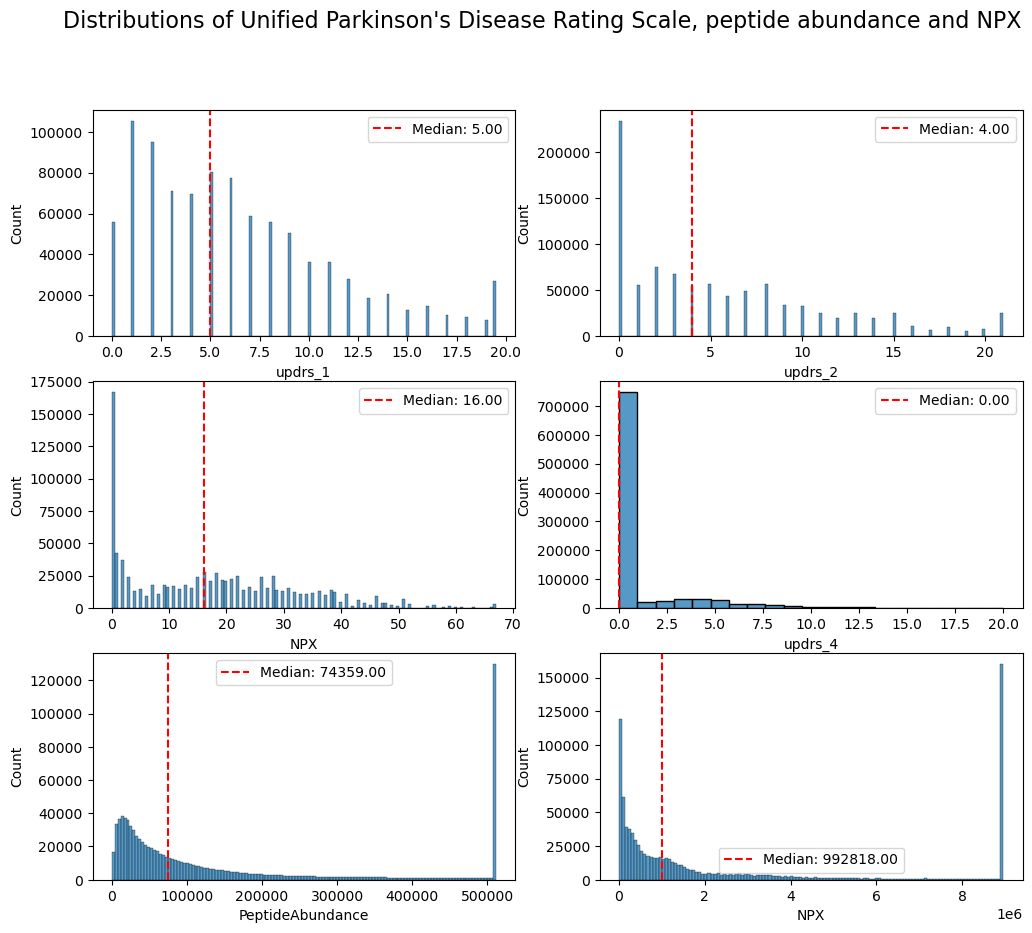

In [25]:
def plot_clinical_x(all_train_data):
    # Create a figure with four subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))

    # Create boxenplots for each subplot
    sns.histplot(all_train_data['updrs_1'], ax=axes[0, 0])
    sns.histplot(all_train_data['updrs_2'], ax=axes[0, 1])
    sns.histplot(all_train_data['updrs_3'], ax=axes[1, 0])
    sns.histplot(all_train_data['updrs_4'], ax=axes[1, 1])
    sns.histplot(all_train_data['PeptideAbundance'],ax=axes[2, 0])
    sns.histplot(all_train_data['NPX'],ax=axes[2, 1])
    
    # Add a vertical line for the median of each distribution
    for ax in axes.flatten():
        median = all_train_data[ax.get_xlabel()].median()
        ax.axvline(median, color='r', linestyle='--', label=f"Median: {median:.2f}")
        ax.legend()

    # Add labels and titles for each plot
    axes[0, 0].set_xlabel("updrs_1")
    axes[0, 0].set_ylabel("Count")

    axes[0, 1].set_xlabel("updrs_2")
    axes[0, 1].set_ylabel("Count")

    axes[1, 0].set_xlabel("updrs_3")
    axes[1, 0].set_ylabel("Count")

    axes[1, 0].set_xlabel("PeptideAbundance")
    axes[1, 0].set_ylabel("Count")
    
    axes[1, 0].set_xlabel("NPX")
    axes[1, 0].set_ylabel("Count")
    # Add a title for the entire figure
    fig.suptitle("Distributions of Unified Parkinson's Disease Rating Scale, peptide abundance and NPX", fontsize=16)

    # Show the plots
    plt.show()
    
plot_clinical_x(all_train_data)

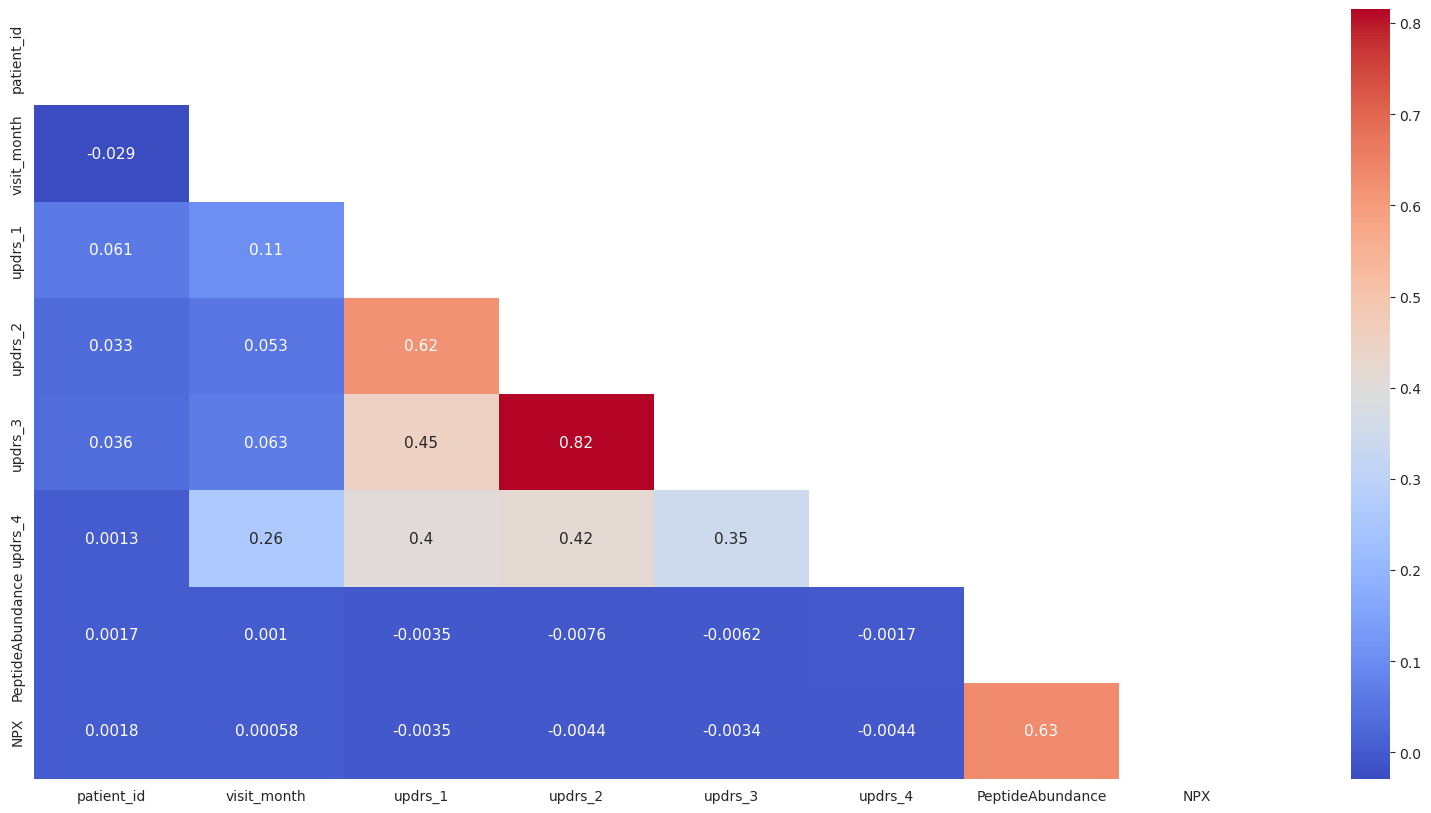

In [26]:
# Spearman Correlation
# ref: https://www.kaggle.com/code/benjenkins96/eda-statistical-analysis-optuna-83-smape#Spearman-Correlation-Amongst-all-Features
def plot_spearman(df=all_train_data):
    """
    plots the spearman correlation
    """
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    df_corr = df.corr(method='spearman')
    mask = np.triu(np.ones_like(df_corr, dtype='bool'))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', cbar=True, annot_kws={'size':11}, mask=mask)
    plt.tick_params(labelsize=10)
    plt.show()
    
plot_spearman(all_train_data)

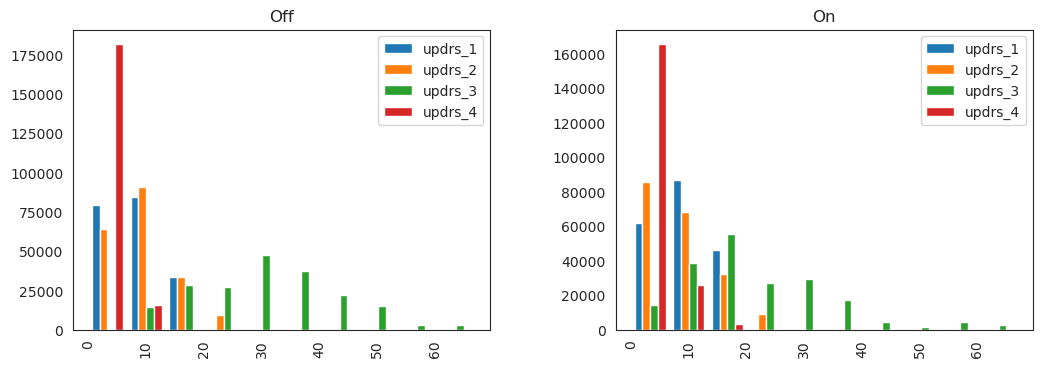

In [27]:
all_train_data[['updrs_1', 'updrs_2','updrs_3', 'updrs_4',"upd23b_clinical_state_on_medication"]].hist( 
    by="upd23b_clinical_state_on_medication",
    figsize=(12,4), legend = True)
plt.show()

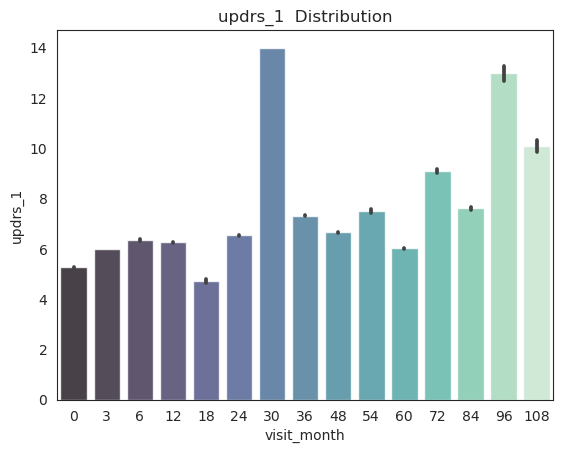

<Figure size 1200x500 with 0 Axes>

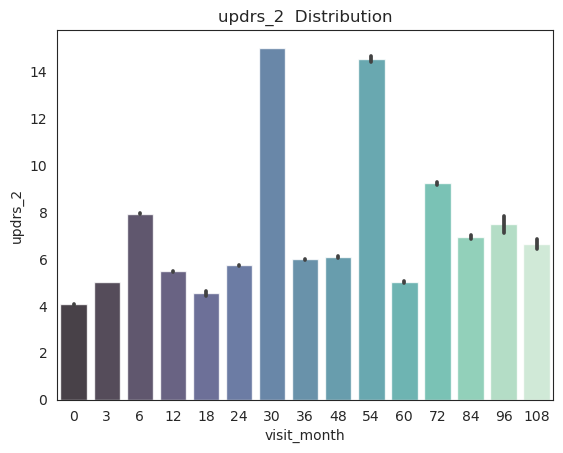

<Figure size 1200x500 with 0 Axes>

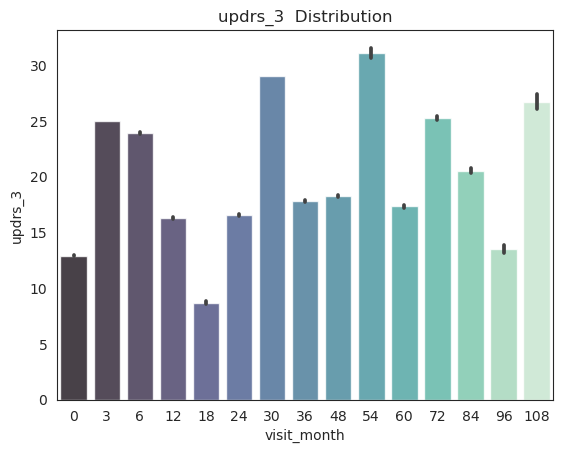

<Figure size 1200x500 with 0 Axes>

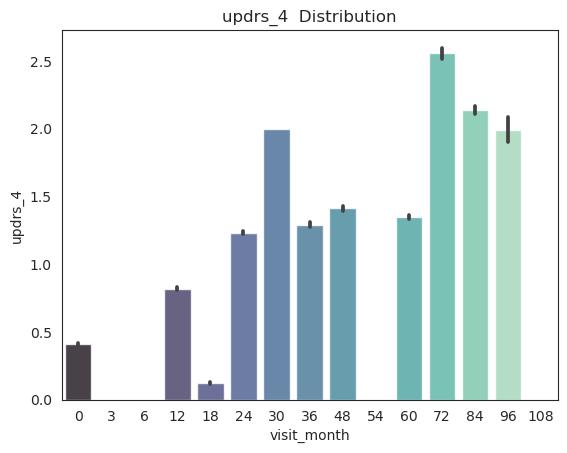

<Figure size 1200x500 with 0 Axes>

In [28]:
#distribution of uprds scores over pateint visits months 
cols =  ['updrs_1', 'updrs_2','updrs_3', 'updrs_4']
for i,col in enumerate(cols):
    fig = sns.barplot(data = all_train_data, y=col,x = 'visit_month',alpha=0.8, palette="mako")
    plt.title(col + '  Distribution')
    plt.figure(figsize=(12, 5))
    plt.show()

In [29]:
# Preparing data for model training
all_data = all_train_data
df = all_data.drop(['upd23b_clinical_state_on_medication'], axis=1)
pivoted_df = df.pivot(index = 'visit_id', columns = ['Peptide'], values = 'PeptideAbundance')
all_clinical = all_data[['updrs_1', 'updrs_2','updrs_3', 'updrs_4', 'visit_id', 'visit_month']]
all_df = pd.merge(pivoted_df,all_clinical, on ='visit_id', how='right').set_index('visit_id')
all_df.head()


,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK,updrs_1,updrs_2,updrs_3,updrs_4,visit_month
visit_id,,,,,,,,,,,,,,,,,,,,,
55_0,511528.9375,53855.6,511528.9375,NaN,19735.4,114400.0,46371.1,70412.0,511528.9375,39389.3,...,131155.0,165851.0,437305.0,46289.2,14898.4,10.0,6.0,15.0,0.0,0
55_0,511528.9375,53855.6,511528.9375,NaN,19735.4,114400.0,46371.1,70412.0,511528.9375,39389.3,...,131155.0,165851.0,437305.0,46289.2,14898.4,10.0,6.0,15.0,0.0,0
55_0,511528.9375,53855.6,511528.9375,NaN,19735.4,114400.0,46371.1,70412.0,511528.9375,39389.3,...,131155.0,165851.0,437305.0,46289.2,14898.4,10.0,6.0,15.0,0.0,0
55_0,511528.9375,53855.6,511528.9375,NaN,19735.4,114400.0,46371.1,70412.0,511528.9375,39389.3,...,131155.0,165851.0,437305.0,46289.2,14898.4,10.0,6.0,15.0,0.0,0
55_0,511528.9375,53855.6,511528.9375,NaN,19735.4,114400.0,46371.1,70412.0,511528.9375,39389.3,...,131155.0,165851.0,437305.0,46289.2,14898.4,10.0,6.0,15.0,0.0,0


In [30]:
x = all_df.select_dtypes(include=['object'])
x.head()

""
visit_id
55_0
55_0
55_0
55_0
55_0


In [32]:
def lasso_regression(X_in, Y_in):
    from sklearn import linear_model
    lasso = linear_model.Lasso(alpha=0.1)
    # Select the top 1 features with the highest F-values.
    selector1 = SelectKBest(f_regression, k = 5)
    X_new1 = selector1.fit_transform(X_in, Y_in)
    X_new1 = np.column_stack((X_in['visit_month'].values, X_new1))

    # Split the dataset into training and testing sets.
    X_train_updrs1, X_test_updrs1, y_train_updrs1, y_test_updrs1 = train_test_split(X_new1, Y_in, test_size = 0.2, random_state = 42)

    # Standardize the independent variables.
    scaler1 = StandardScaler()
    X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
    X_test_updrs1 = scaler1.transform(X_test_updrs1)

    lasso.fit(X_train_updrs1, y_train_updrs1)
    y_pred_updrs1 = lasso.predict(X_test_updrs1)
    mse_updrs1 = mean_squared_error(y_test_updrs1, y_pred_updrs1)
    return mse_updrs1
    

In [ ]:
def random_forest(X_in, Y_in):

    # Select the top 5 features with the highest F-values.
    selector1 = SelectKBest(f_regression, k = 5)
    X_new1 = selector1.fit_transform(X_in, Y_in)
    
    X_new1 = np.column_stack((X_in['visit_month'].values, X_new1))

    # Split the dataset into training and testing sets.
    X_train_updrs, X_test_updrs, y_train_updrs, y_test_updrs = train_test_split(X_in, Y_in, test_size = 0.2, random_state = 42)

    
    # Standardize the independent variables.
    scaler1 = StandardScaler()
    X_train_updrs1 = scaler1.fit_transform(X_train_updrs1)
    X_test_updrs1 = scaler1.transform(X_test_updrs1)

    model_randomforest = RandomForestRegressor(max_depth=2, random_state=0)
    model_randomforest.fit(X_train_updrs1, y_train_updrs1)
    y_pred_updrs = model_randomforest.predict(X_test_updrs)
    

    # Evaluate the performance of the model.
    mse_updrs = mean_squared_error(y_test_updrs, y_pred_updrs)
    mae_updrs = mean_absolute_error(y_test_updrs, y_pred_updrs)
    r2_updrs = r2_score(y_test_updrs, y_pred_updrs)

    # mean squared error, mean absolute error, r2 score, and SMAPE for updrs_1
    print("mse_updrs:", mse_updrs)
    print("mae_updrs:", mae_updrs)
    print("r2_updrs:", r2_updrs)
    print("SMAPE_updrs:", smape(y_test_updrs, y_pred_updrs))  
    
    return mse_updrs

In [ ]:
# Random forest regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
all_df_new = my_imputer.fit_transform(all_df)
all_df_new = pd.DataFrame(all_df_new)
all_df_new.columns = all_df.columns

print("Random forest prediction of updrs_1")
df_updrs1 =all_df_new.drop(["updrs_2", "updrs_3", "updrs_4"], axis=1)
X_updrs1 = df_updrs1.drop(["updrs_1"], axis=1)
y_updrs1 = df_updrs1["updrs_1"]
mse_updrs1 = random_forest(X_updrs1, y_updrs1)
print(mse_updrs1)

print("Random forest prediction of updrs_2")
df_updrs2 =all_df_new.drop(["updrs_1", "updrs_3", "updrs_4"], axis=1)
X_updrs2 = df_updrs2.drop(["updrs_2"], axis=1)
y_updrs2 = df_updrs2["updrs_2"]
mse_updrs2 = random_forest(X_updrs2, y_updrs2)
print(mse_updrs2)

print("Random forest prediction of updrs_3")
df_updrs3 =all_df_new.drop(["updrs_1", "updrs_2", "updrs_4"], axis=1)
X_updrs3 = df_updrs3.drop(["updrs_3"], axis=1)
y_updrs3 = df_updrs3["updrs_3"]
mse_updrs3 = random_forest(X_updrs3, y_updrs3)
print(mse_updrs3)

print("Random forest prediction of updrs_4")
df_updrs4 =all_df_new.drop(["updrs_1", "updrs_2", "updrs_3"], axis=1)
X_updrs4 = df_updrs4.drop(["updrs_4"], axis=1)
y_updrs4 = df_updrs4["updrs_4"]
mse_updrs4 = random_forest(X_updrs4, y_updrs4)
print(mse_updrs1)

Random forest prediction of updrs_1


In [ ]:
# lasso regression
from sklearn import linear_model
lf = linear_model.Lasso(alpha=0.1)

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
all_df_new = my_imputer.fit_transform(all_df)
all_df_new = pd.DataFrame(all_df_new)
all_df_new.columns = all_df.columns

print("prediction of lasso regression of updrs_1")
df_updrs1 =all_df_new.drop(["updrs_2", "updrs_3", "updrs_4"], axis=1)
X_updrs1 = df_updrs1.drop(["updrs_1"], axis=1)
y_updrs1 = df_updrs1["updrs_1"]
mse_updrs1 = lasso_regression(X_updrs1, y_updrs1)
print(mse_updrs1)


print("prediction of lasso regression of updrs_2")
df_updrs2 =all_df_new.drop(["updrs_1", "updrs_3", "updrs_4"], axis=1)
X_updrs2 = df_updrs2.drop(["updrs_2"], axis=1)
y_updrs2 = df_updrs2["updrs_2"]
mse_updrs2 = random_forest(X_updrs2, y_updrs2)
mse_updrs2 = lasso_regression(X_updrs2, y_updrs2)
print(mse_updrs2)

print("prediction of lasso regression of updrs_3")
df_updrs3 =all_df_new.drop(["updrs_1", "updrs_2", "updrs_4"], axis=1)
X_updrs3 = df_updrs3.drop(["updrs_3"], axis=1)
y_updrs3 = df_updrs3["updrs_3"]
mse_updrs3 = random_forest(X_updrs3, y_updrs3)
print(mse_updrs3)

print("prediction of lasso regression of updrs_4")
df_updrs4 =all_df_new.drop(["updrs_1", "updrs_2", "updrs_3"], axis=1)
X_updrs4 = df_updrs4.drop(["updrs_4"], axis=1)
y_updrs4 = df_updrs4["updrs_4"]
mse_updrs4 = random_forest(X_updrs4, y_updrs4)
print(mse_updrs4)